### Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
tit_df=pd.read_csv("titanic-training-data.csv")

In [4]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit_df.shape

(891, 12)

In [6]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
tit_df=tit_df.drop("Cabin",axis=1)

In [10]:
tit_df.shape

(891, 11)

In [11]:
age_median=tit_df["Age"].median()
age_median

28.0

In [12]:
tit_df["Age"]=tit_df["Age"].replace(np.nan,age_median)

In [13]:
tit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
emb_mode=tit_df["Embarked"].mode()[0]
emb_mode

'S'

In [15]:
tit_df["Embarked"]=tit_df["Embarked"].replace(np.nan,emb_mode)

In [16]:
tit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Outliers

<Axes: xlabel='Age'>

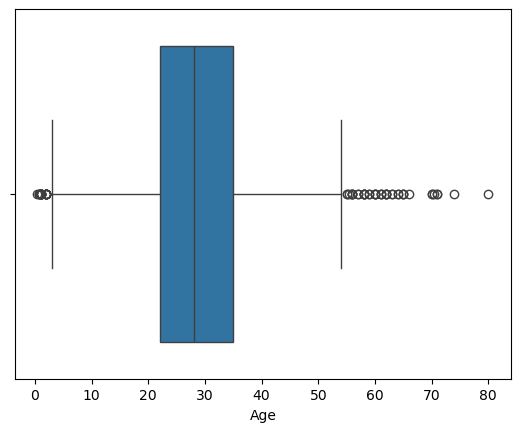

In [56]:
sns.boxplot(x="Age",data=tit_df)

In [57]:
tit_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Task 1:Loan dataset

### Handling Hidden missing values

In [32]:
auto_df=pd.read_csv("auto-mpg.csv")

In [33]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
auto_df.shape

(398, 9)

In [35]:
auto_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [36]:
auto_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [37]:
auto_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
auto_df.sample(25)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
177,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls
307,26.8,6,173.0,115,2700,12.9,79,1,oldsmobile omega brougham
181,33.0,4,91.0,53,1795,17.5,75,3,honda civic cvcc
225,17.5,6,250.0,110,3520,16.4,77,1,chevrolet concours
87,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
365,20.2,6,200.0,88,3060,17.1,81,1,ford granada gl
205,28.0,4,97.0,75,2155,16.4,76,3,toyota corolla
218,36.0,4,79.0,58,1825,18.6,77,2,renault 5 gtl
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin


In [39]:
auto_df["hp"]=auto_df["hp"].replace('?',np.nan)
auto_df["hp"]=auto_df["hp"].astype(float)

In [40]:
auto_df.dtypes


mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [41]:
hp_median=auto_df["hp"].median()
hp_median

93.5

In [42]:
auto_df["hp"]=auto_df["hp"].replace(np.nan,hp_median)
auto_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [43]:
auto_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [47]:
auto_df.sample(25)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
308,33.5,4,151.0,90.0,2556,13.2,79,1,pontiac phoenix
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
184,25.0,4,140.0,92.0,2572,14.9,76,1,capri ii
91,13.0,8,400.0,150.0,4464,12.0,73,1,chevrolet caprice classic
78,21.0,4,120.0,87.0,2979,19.5,72,2,peugeot 504 (sw)
160,17.0,6,231.0,110.0,3907,21.0,75,1,buick century
233,29.0,4,97.0,78.0,1940,14.5,77,2,volkswagen rabbit custom
182,28.0,4,107.0,86.0,2464,15.5,76,2,fiat 131
230,15.5,8,350.0,170.0,4165,11.4,77,1,chevrolet monte carlo landau


In [ ]:
### Task 2: pima diabetes dataset

In [50]:
pima_df=pd.read_csv("pima-indians-diabetes .csv")

In [51]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
### Duplicates
duplicate=pima_df.duplicated()
duplicate.sum()

0

In [ ]:
How to display max rows and columns using pandas->stack overflow->set_option

In [58]:
### Assessment-1:Absenteeism at work->Load the dataset,missing values,duplicates,Treat the missing values
### Assessment -2:HousePrices dataset->Do the same 